In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<div style="text-align:center; background-color:#dc3545; padding:20px;">
  <h1 style="font-size:36px; color:#ffeeba;"><b>1.EDA (Explotary Data Analysis)</b></h1>
</div>


In [2]:
df = pd.read_csv('/kaggle/input/dataset/df_file.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [4]:
df.tail(20)

,Text,Label
2205,Barclays profits hit record level\n \n Barclay...,4
2206,Asian banks halt dollar's slide\n \n The dolla...,4
2207,Venezuela and China sign oil deal\n \n Venezue...,4
2208,UK homes hit Â£3.3 trillion total\n \n The val...,4
2209,China's Shanda buys stake in Sina\n \n Chinese...,4
2210,EU 'too slow' on economic reforms\n \n Most EU...,4
2211,Economy 'strong' in election year\n \n UK busi...,4
2212,Saab to build Cadillacs in Sweden\n \n General...,4
2213,Bad weather hits Nestle sales\n \n A combinati...,4
2214,US Ahold suppliers face charges\n \n US prosec...,4


In [5]:
df['Label'].unique()

array([0, 1, 2, 3, 4])

In [6]:
df['Label'].value_counts()

Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

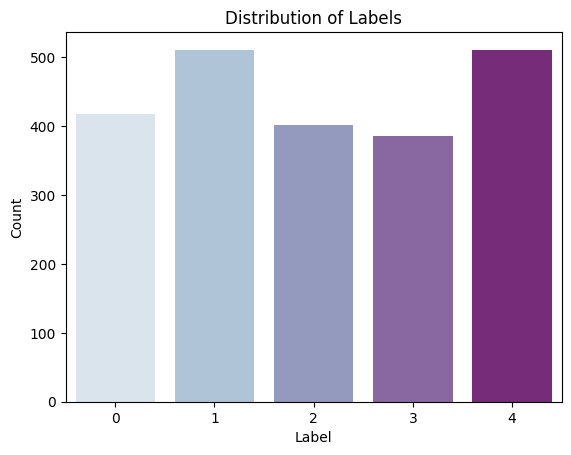

In [7]:
sns.countplot(data=df, x='Label', palette='BuPu')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [8]:
text = df['Text']
label = df['Label']

<div style="text-align:center; background-color:#dc3545; padding:20px;">
  <h1 style="font-size:36px; color:#ffeeba;"><b>2.Text Preprocessing</b></h1>
</div>


In [9]:
import re
def clean(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [10]:
df['cleaned_text'] = df['Text'].apply(clean)

In [11]:
df['cleaned_text']

0       budget to set scene for election gordon brown ...
1       army chiefs in regiments decision military chi...
2       howard denies split over id cards michael howa...
3       observers to monitor uk election ministers wil...
4       kilroy names election seat target exchat show ...
                              ...                        
2220    india opens skies to competition india will al...
2221    yukos bankruptcy not us matter russian authori...
2222    survey confirms property slowdown government f...
2223    high fuel prices hit bas profits british airwa...
2224    us trade gap hits record in 2004 the gap betwe...
Name: cleaned_text, Length: 2225, dtype: object

# Removing Stopwords

In [12]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwrods(text):
    filtered = ' '.join(word for word in text.split() if word not in stop_words)
    return filtered

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwrods)

# Tokenization, Lemmatizationm, Stemming

In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('punkt_tab')
# Initialize lemmatizer and stemmer
def tokenize(text): # tokenize text into words
    ans = word_tokenize(text)
    return ans

def stemmer(text): # apply stemming on text
    stemmer_instance = PorterStemmer()
    ans = [stemmer_instance.stem(word) for word in text]
    return ans

def lemmatizer(text): # apply lemmatization on text
    ans = [WordNetLemmatizer().lemmatize(word) for word in text]
    return ans

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:
df['tockenized'] = df['cleaned_text'].apply(lambda x: tokenize(x))

In [16]:
# Thsi is for solving the problem of lemmatization in kaggle
import zipfile
import os

# Define a path for NLTK data
nltk.data.path.append('/kaggle/working/nltk_data')

# Download WordNet and its dependencies
nltk.download('wordnet', download_dir='/kaggle/working/nltk_data')
nltk.download('omw-1.4', download_dir='/kaggle/working/nltk_data')


# Define the path to corpora
corpora_path = '/kaggle/working/nltk_data/corpora'

# Extract wordnet.zip
with zipfile.ZipFile(os.path.join(corpora_path, 'wordnet.zip'), 'r') as zip_ref:
    zip_ref.extractall(corpora_path)

# Extract omw-1.4.zip
with zipfile.ZipFile(os.path.join(corpora_path, 'omw-1.4.zip'), 'r') as zip_ref:
    zip_ref.extractall(corpora_path)

print("Extraction complete.")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Extraction complete.


In [17]:
df['tockenized'] = df['tockenized'].apply(lambda x: lemmatizer(x))

In [18]:
df['tockenized'] = df['tockenized'].apply(lambda x: stemmer(x))

In [19]:
from tensorflow import keras
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['tockenized'])
df['sequence'] = tokenizer.texts_to_sequences(df['tockenized'])

2025-05-09 13:03:12.446098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746795792.465945   26205 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746795792.472726   26205 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
df.head()

,Text,Label,cleaned_text,tockenized,sequence
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,"[budget, set, scene, elect, gordon, brown, see...","[392, 51, 1319, 63, 754, 139, 709, 102, 138, 3..."
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,"[armi, chief, regiment, decis, militari, chief...","[2595, 148, 2728, 182, 1887, 148, 60, 155, 16,..."
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,"[howard, deni, split, id, card, michael, howar...","[237, 453, 1798, 717, 355, 331, 237, 453, 1082..."
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,"[observ, monitor, uk, elect, minist, invit, in...","[1647, 1057, 29, 63, 64, 1975, 151, 1647, 1563..."
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target exchat show ...,"[kilroy, name, elect, seat, target, exchat, sh...","[3655, 218, 63, 1098, 361, 9498, 30, 548, 755,..."


In [21]:
len(df['sequence'])

2225

In [22]:
(df['sequence'].apply(lambda x:len(x)))/len(df['sequence'])

0       0.141124
1       0.122697
2       0.142472
3       0.135281
4       0.117753
          ...   
2220    0.065169
2221    0.104270
2222    0.080000
2223    0.119101
2224    0.092135
Name: sequence, Length: 2225, dtype: float64

In [23]:
input_shape=int(sum(df['sequence'].apply(lambda x:len(x)))/len(df['sequence']))

In [24]:
input_shape

222

In [25]:
from keras.preprocessing.sequence import pad_sequences

lengths = [len(seq) for seq in df['sequence']]

# Get some statistics
print(f"Average length: {np.mean(lengths)}")
print(f"Median length: {np.median(lengths)}")
print(f"95th percentile: {np.percentile(lengths, 95)}")
print(f"Max length: {max(lengths)}")

Average length: 222.9429213483146
Median length: 197.0
95th percentile: 409.0
Max length: 2242


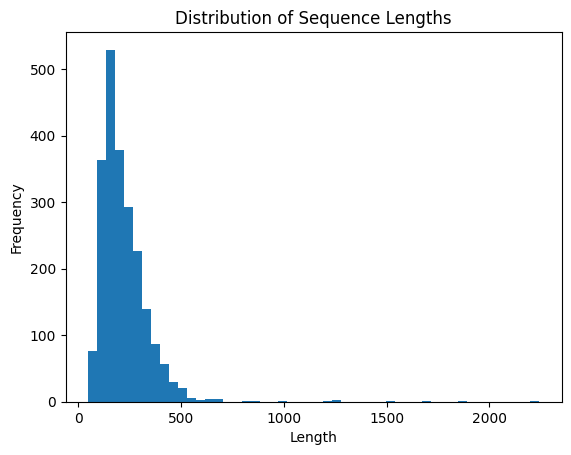

In [26]:
import matplotlib.pyplot as plt
plt.hist(lengths, bins=50)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Sequence Padding
from keras.preprocessing.sequence import pad_sequences
X=pad_sequences(df['sequence'],maxlen=197)

In [28]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
y=LB.fit_transform(label)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=100)
print("X_train : \n",X_train)
print("X_test  : \n",X_test)

X_train : 
 [[   0    0    0 ...  995   18   13]
 [   0    0    0 ...   97  366 5342]
 [   0    0    0 ... 1815   85 2023]
 ...
 [   0    0    0 ... 7440 1108   71]
 [   0    0    0 ...  604  681 2021]
 [   0    0    0 ... 5972  169 1577]]
X_test  : 
 [[    0     0     0 ...  1962   186   180]
 [    0     0     0 ...   316  1659  3164]
 [    0     0     0 ...  2168   753   573]
 ...
 [18830   246  2746 ...   338   964  4530]
 [ 1410   854    50 ...    21   443    24]
 [    0     0     0 ...   882     3   114]]


In [30]:
print("X_train shape : ",X_train.shape)
print("X_test  shape : ",X_test.shape)

X_train shape :  (1780, 197)
X_test  shape :  (445, 197)


In [31]:
Max_words=(max(map(max, X)))+1

In [32]:
Max_words

24110

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    
    Embedding(Max_words + 1, 100, input_length=input_shape),
    
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    
    LSTM(128),
    Dropout(0.3),
    
    Dense(32, activation='selu'),
    Dropout(0.2),
    
    Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1746795796.260696   26205 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [34]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_path = "model_checkpoints/checkpoint.weights.h5"
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5),
    ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=True,
        save_best_only=True,
        monitor='val_accuracy',
        verbose=1
    )

]

In [36]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=20,
    callbacks= callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/25


I0000 00:00:1746795802.172635   26251 cuda_dnn.cc:529] Loaded cuDNN version 90300


71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3007 - loss: 1.4853
Epoch 1: val_accuracy improved from -inf to 0.68539, saving model to model_checkpoints/checkpoint.weights.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.3041 - loss: 1.4796 - val_accuracy: 0.6854 - val_loss: 0.8171 - learning_rate: 0.0010
Epoch 2/25
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8002 - loss: 0.5879
Epoch 2: val_accuracy did not improve from 0.68539
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8003 - loss: 0.5898 - val_accuracy: 0.5506 - val_loss: 1.3134 - learning_rate: 0.0010
Epoch 3/25
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8023 - loss: 0.5883
Epoch 3: val_accuracy improved from 0.68539 to 0.88764, saving model to model_checkpoints/checkpoint.weights.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8059 - loss: 0.5783 - val_accuracy: 0.8876 - val_loss: 0.4041 - learning_rate: 0.0010
Epoch 4/25
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0

In [37]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest accuracy: {test_accuracy:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9027 - loss: 0.5071

Test accuracy: 0.9146
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        84
           1       0.96      0.96      0.96       100
           2       0.95      0.82      0.88        91
           3       0.89      0.92      0.91        64
           4       0.92      0.92      0.92       106

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.92      0.91      0.91       445


Confusion Matrix:
[[80  1  0  1  2]
 [ 1 96  1  2  0]
 [ 7  1 75  2  6]
 [ 1  1  2 59  1]
 [ 5  1  1  2 97]]


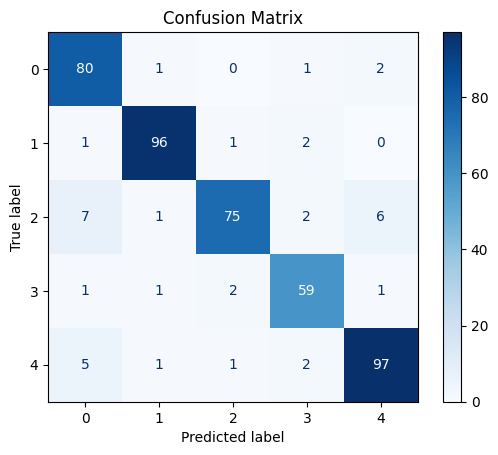

In [38]:
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Hyperparameter Optimization using Genetic Algorithm

In [39]:
# Hyperparameter ranges
PARAM_RANGES = {
    'lstm1_units': (64, 512),  # First LSTM layer units
    'lstm2_units': (32, 256),  # Second LSTM layer units
    'dense_units': (16, 64),   # Dense layer units
    'dropout1': (0.1, 0.5),    # First dropout rate
    'dropout2': (0.1, 0.5),    # Second dropout rate
    'learning_rate': (0.0001, 0.01)
}

POP_SIZE = 10
CHROMOSOME_LENGTH = 6  # Number of hyperparameters
GENERATIONS = 15
MUTATION_RATE = 0.1

def encode_params(params):
    """Convert parameters to binary string"""
    chromosome = ''
    for param, value in params.items():
        param_min, param_max = PARAM_RANGES[param]
        normalized = (value - param_min) / (param_max - param_min) # Normalization process
        binary = format(int(normalized * 31), '05b')  # 5 bits per parameter (31 because we have 5 bits (05b))
        chromosome += binary
    return chromosome

def decode_chromosome(chromosome):
    """Convert binary string to parameters dictionary"""
    params = {}
    chunk_size = 5
    param_names = list(PARAM_RANGES.keys())
    
    for i, param in enumerate(param_names):
        chunk = chromosome[i*chunk_size:(i+1)*chunk_size]
        normalized = int(chunk, 2) / 31
        param_min, param_max = PARAM_RANGES[param]
        value = param_min + normalized * (param_max - param_min)
        params[param] = value
    
    return params

def fitness(chromosome, X_train, y_train, X_val, y_val):
    """Fitness function - train LSTM and return validation accuracy"""
    params = decode_chromosome(chromosome)
    
    model = Sequential([
        Embedding(Max_words + 1, 100, input_length=input_shape),
        LSTM(int(params['lstm1_units']), return_sequences=True),
        Dropout(params['dropout1']),
        LSTM(int(params['lstm2_units'])),
        Dropout(params['dropout2']),
        Dense(int(params['dense_units']), activation='selu'),
        Dense(5, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        epochs=5,  # Reduced epochs for faster evaluation
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=0
    )
    
    return history.history['val_accuracy'][-1]

# Selection using roulette wheel
def roulette_wheel(pop, fitnesses):
    total = sum(fitnesses)
    probs = [f / total for f in fitnesses]
    selected = random.choices(pop, weights=probs, k=2)
    return selected

# Crossover (single point)
def crossover(parent1, parent2):
    point = random.randint(1, CHROMOSOME_LENGTH*5 - 1)
    return (parent1[:point] + parent2[point:], parent2[:point] + parent1[point:])

# Mutation
def mutate(chromosome):
    mutated = ''
    for bit in chromosome:
        if random.random() < MUTATION_RATE:
            mutated += '0' if bit == '1' else '1'
        else:
            mutated += bit
    return mutated

def optimize_hyperparameters(X_train, y_train, X_val, y_val):
    """Main optimization function with history tracking"""
    population = [''.join(random.choices('01', k=CHROMOSOME_LENGTH*5)) for _ in range(POP_SIZE)]
    
    # Initialize history dictionaries
    history = {
        'best_fitness_per_gen': [],        # Best fitness score in each generation
        'avg_fitness_per_gen': [],         # Average fitness score in each generation
        'best_params_per_gen': [],         # Best parameters in each generation
        'all_fitnesses': []                # All fitness values (flattened across generations)
    }
    
    best_fitness = 0
    best_params = None
    
    for generation in range(GENERATIONS):
        fitnesses = [fitness(ind, X_train, y_train, X_val, y_val) for ind in population]
        
        # Track all fitness values
        history['all_fitnesses'].extend(fitnesses)
        
        # Track average fitness for this generation
        avg_fitness = sum(fitnesses) / len(fitnesses)
        history['avg_fitness_per_gen'].append(avg_fitness)
        
        # Track best solution in this generation
        gen_best_fitness = max(fitnesses)
        gen_best_idx = fitnesses.index(gen_best_fitness)
        gen_best_params = decode_chromosome(population[gen_best_idx])
        
        # Save best fitness and params for this generation
        history['best_fitness_per_gen'].append(gen_best_fitness)
        history['best_params_per_gen'].append(gen_best_params)
        
        # Update global best if needed
        if gen_best_fitness > best_fitness:
            best_fitness = gen_best_fitness
            best_params = gen_best_params
            
        print(f"Generation {generation}, Best Fitness: {gen_best_fitness:.4f}, Avg Fitness: {avg_fitness:.4f}")
        print(f"Best params: {gen_best_params}")
        
        new_population = []
        while len(new_population) < POP_SIZE:
            parent1, parent2 = roulette_wheel(population, fitnesses)
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1), mutate(child2)])
        
        population = new_population[:POP_SIZE]
    
    return best_params, best_fitness, history

In [40]:
def plot_fitness_history(history):
    """Plot the evolution of fitness scores over generations"""
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 8))
    
    # Plot best and average fitness per generation
    generations = range(len(history['best_fitness_per_gen']))
    plt.subplot(2, 1, 1)
    plt.plot(generations, history['best_fitness_per_gen'], 'b-', label='Best Fitness')
    plt.plot(generations, history['avg_fitness_per_gen'], 'r-', label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness Score (Validation Accuracy)')
    plt.title('Fitness Evolution')
    plt.legend()
    plt.grid(True)
    
    # Plot distribution of all fitness values
    plt.subplot(2, 1, 2)
    plt.hist(history['all_fitnesses'], bins=20, alpha=0.7)
    plt.xlabel('Fitness Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of All Fitness Values')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Example code to visualize hyperparameter evolution
def plot_hyperparameter_evolution(history):
    """Plot the evolution of hyperparameters over generations"""
    import matplotlib.pyplot as plt
    
    param_names = list(PARAM_RANGES.keys())
    generations = range(len(history['best_params_per_gen']))
    
    plt.figure(figsize=(15, 10))
    
    for i, param in enumerate(param_names):
        plt.subplot(3, 2, i+1)
        
        # Extract parameter values across generations
        values = [history['best_params_per_gen'][gen][param] for gen in generations]
        
        plt.plot(generations, values, 'o-')
        plt.xlabel('Generation')
        plt.ylabel(param)
        plt.title(f'Evolution of {param}')
        plt.grid(True)
        
        # Add horizontal lines for parameter range
        param_min, param_max = PARAM_RANGES[param]
        plt.axhline(y=param_min, color='r', linestyle='--', alpha=0.3)
        plt.axhline(y=param_max, color='r', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Generation 0, Best Fitness: 0.8737, Avg Fitness: 0.5453
Best params: {'lstm1_units': 237.41935483870967, 'lstm2_units': 227.09677419354838, 'dense_units': 37.677419354838705, 'dropout1': 0.22903225806451613, 'dropout2': 0.4096774193548387, 'learning_rate': 0.0010580645161290324}
Generation 1, Best Fitness: 0.8316, Avg Fitness: 0.6747
Best params: {'lstm1_units': 107.35483870967741, 'lstm2_units': 104.25806451612902, 'dense_units': 33.03225806451613, 'dropout1': 0.5, 'dropout2': 0.4096774193548387, 'learning_rate': 0.006487096774193549}
Generation 2, Best Fitness: 0.9018, Avg Fitness: 0.6354
Best params: {'lstm1_units': 121.80645161290323, 'lstm2_units': 227.09677419354838, 'dense_units': 31.483870967741936, 'dropout1': 0.4096774193548387, 'dropout2': 0.42258064516129035, 'learning_rate': 0.0010580645161290324}
Generation 3, Best Fitness: 0.8561, Avg Fitness: 0.8246
Best params: {'lstm1_units': 194.06451612903226, 'lstm2_units': 89.80645161290323, 'dense_units': 54.70967741935483, 'drop

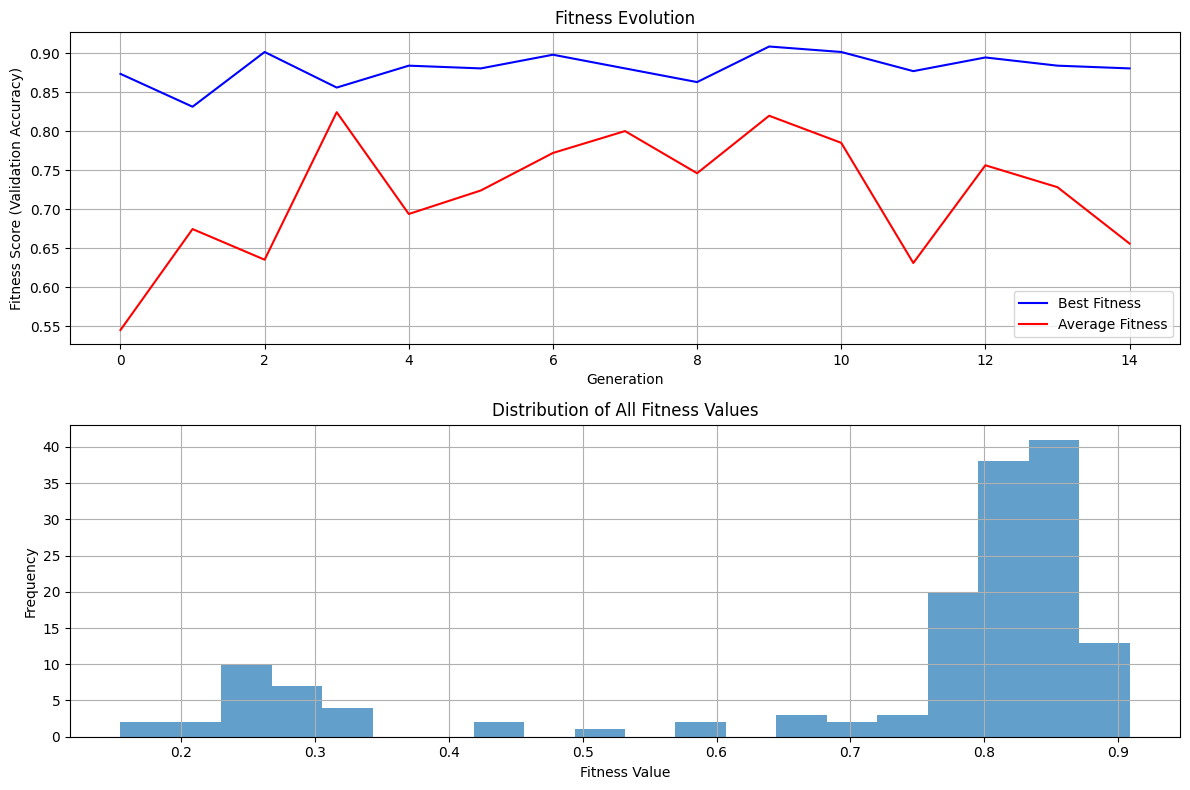

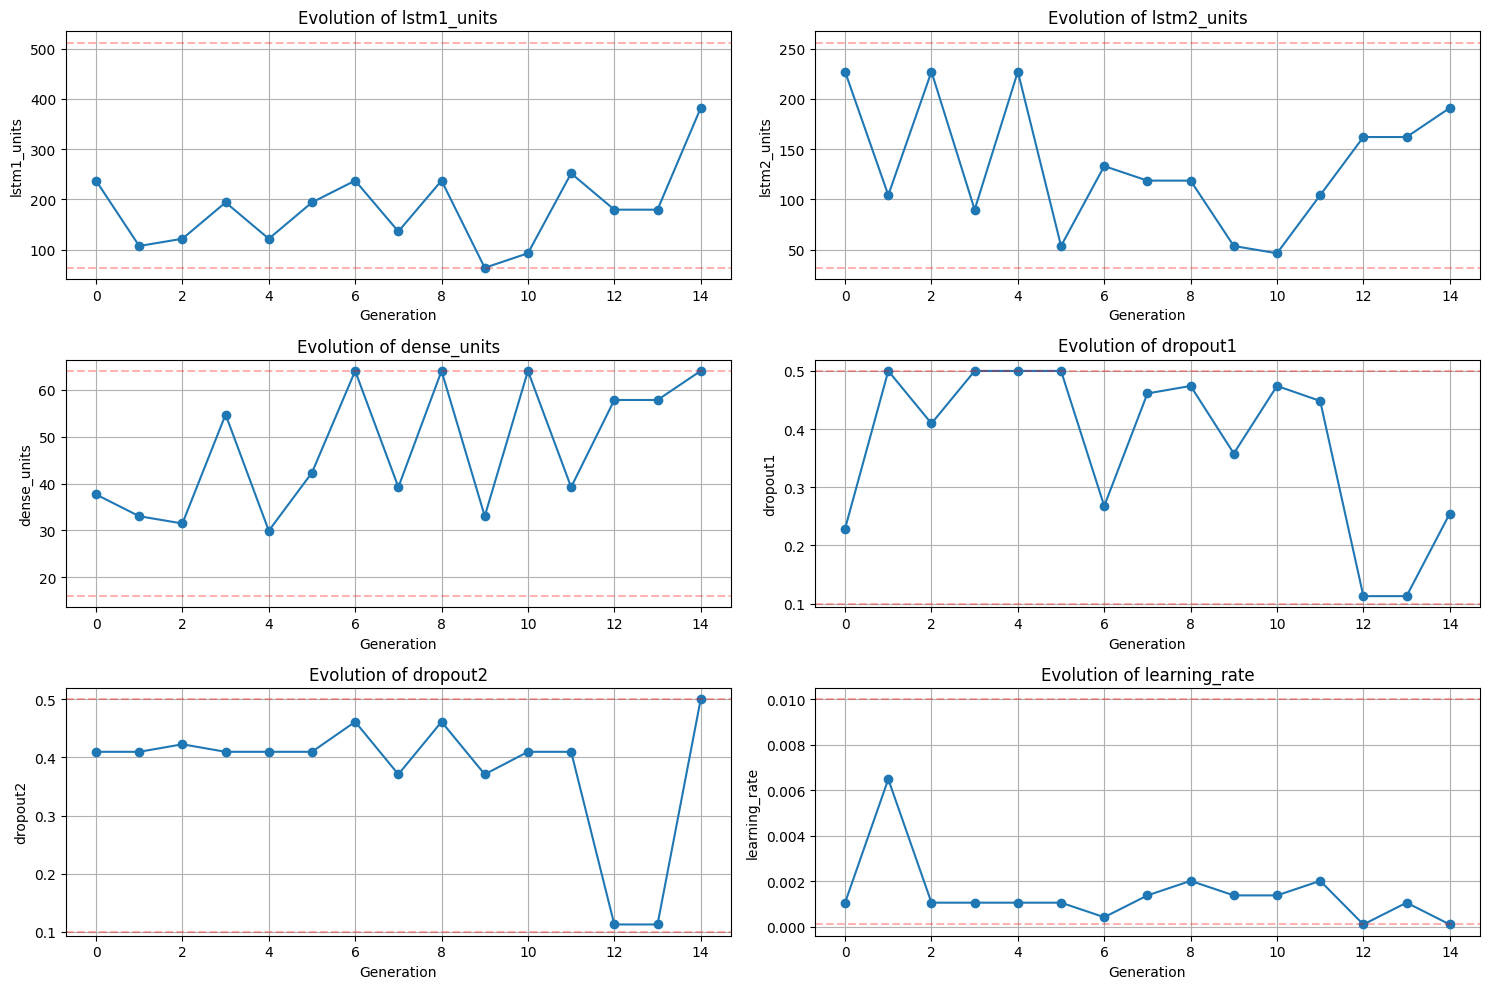

In [42]:
import random
# Create validation set from training data
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

best_params, best_fitness, history = optimize_hyperparameters(X_train, y_train, X_val, y_val)
plot_fitness_history(history)
plot_hyperparameter_evolution(history)

In [43]:
# Create and train final model with best parameters
final_model = Sequential([
    Embedding(Max_words + 1, 100, input_length=input_shape),
    LSTM(int(best_params['lstm1_units']), return_sequences=True),
    Dropout(best_params['dropout1']),
    LSTM(int(best_params['lstm2_units'])),
    Dropout(best_params['dropout2']),
    Dense(int(best_params['dense_units']), activation='selu'),
    Dense(5, activation='softmax')
])

final_model.compile(
    optimizer=Adam(learning_rate=best_params['learning_rate']),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train with original callbacks and full number of epochs
history = final_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=20,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2572 - loss: 1.5763
Epoch 1: val_accuracy did not improve from 0.95225
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.2589 - loss: 1.5743 - val_accuracy: 0.6009 - val_loss: 0.8436 - learning_rate: 0.0014
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6356 - loss: 0.7578
Epoch 2: val_accuracy did not improve from 0.95225
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6365 - loss: 0.7566 - val_accuracy: 0.7544 - val_loss: 0.6656 - learning_rate: 0.0014
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8734 - loss: 0.3758
Epoch 3: val_accuracy did not improve from 0.95225
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8738 - loss: 0.3743 - val_accuracy: 0.8289 - val_loss: 0.5279 - learning_rate: 0.0014
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9542 - loss: 0.1635
Epoch 4: val_accuracy did not improve from 0.95225
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/s

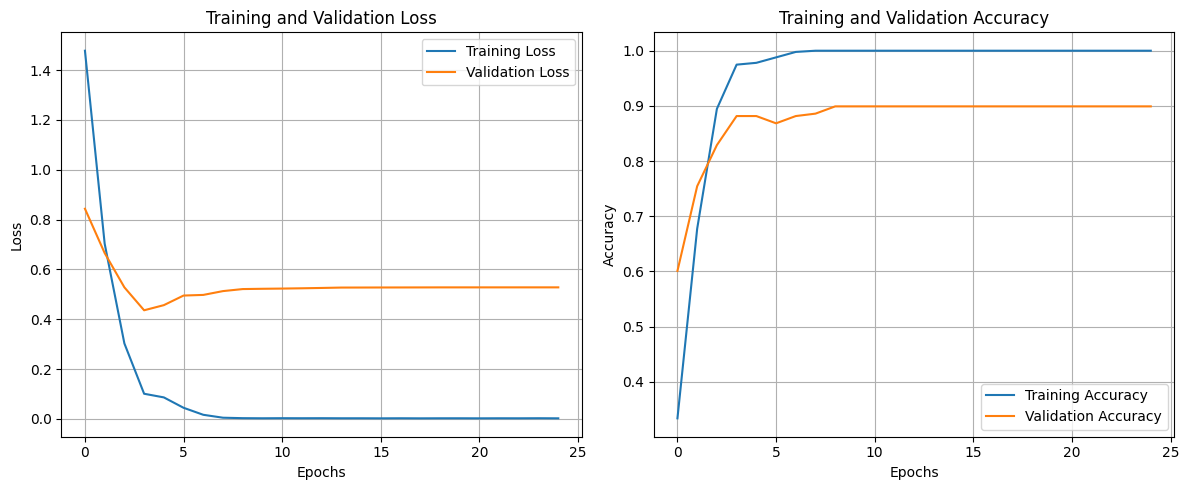

In [44]:
# Plot training vs validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training vs validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [45]:
final_model.save('best_lstm_model.h5')  # Legacy HDF5 format

In [46]:
# Evaluate model on test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Get predictions
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8874 - loss: 0.6092

Test accuracy: 0.8831
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [47]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        84
           1       0.92      0.95      0.94       100
           2       0.92      0.77      0.84        91
           3       0.87      0.94      0.90        64
           4       0.87      0.92      0.89       106

    accuracy                           0.88       445
   macro avg       0.88      0.88      0.88       445
weighted avg       0.88      0.88      0.88       445



<Figure size 1000x800 with 0 Axes>

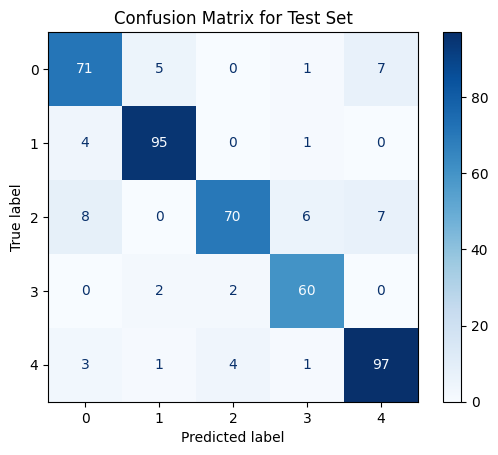

In [49]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [50]:
# Save tokenizer for later use
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [53]:
# sample text for prediction
sample_text = """SA return to Mauritius
 
 Top seeds South Africa return to the scene of one of their most embarrassing failures when they face the Seychelles in the Cosafa Cup next month.
 
 Last year Bafana Bafana were humbled in the first by minnows Mauritius who beat them 2-0 in Curepipe. Coach Stuart Baxter and his squad will return to Curepipe face the Seychelles in their first game of the new-look regional competition. The format of the event has been changed this year after the entry of the Seychelles, who have taken the number of participants to 13. The teams are now divided into three group of four and play knock-out matches on successive days to determine the group champions. Mauritius host the first group, and their opponents are Madagascar, the Seychelles and South Africa. Bafana Bafana play the Seychelles before Mauritius take on Madagascar in a double-header on 26 February. The two winners return to the New George V stadium the next day and the victor of the group decider advances to August's final mini-tournament. The second group will be hosted in Namibia in April. It comprises Zimbabwe, Botswana, Mozambique and the hosts. In June, former champions Zambia will host Lesotho, Malawi and Swaziland in the third group in Lusaka. The three group winners will then join title holders Angola for the last of the mini-tournaments in August, where the winners will be crowned.
 
 Seychelles v South Africa
 
 Mauritius v Madagascar
 
 Winners meet in final match
 
 Mozambique v Zimbabwe
 
 Namibia v Botswana
 
 Winners meet in final match
 
 Lesotho v Malawi
 
 Zambia v Swaziland
 
 Winners meet in final match
"""
# Load tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
# Preprocess the sample text
sample_text = clean(sample_text)
sample_text = remove_stopwrods(sample_text)
sample_text = tokenize(sample_text)
sample_text = lemmatizer(sample_text)
sample_text = stemmer(sample_text)
sample_text = tokenizer.texts_to_sequences([sample_text])

sample_text = pad_sequences(sample_text, maxlen=input_shape)
# Predict the class
predicted_class = final_model.predict(sample_text)
predicted_class = np.argmax(predicted_class, axis=1)
predicted_label = LB.inverse_transform(predicted_class)
print(f"Predicted class: {predicted_label[0]}")    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 1
